# Loan Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd

In [2]:
df1=pd.read_csv("E:\Data Sets\Loan_dataset(train).csv")

In [3]:
df1.shape

(614, 13)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [5]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Checking null values

In [6]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df1.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [9]:
df1['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [11]:
df1['Gender'].isnull().sum()

0

In [12]:
df1['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

## Imputing Null Values

In [13]:
df1['Dependents'].fillna(0,inplace=True)

In [14]:
df1['Gender'].isnull().sum()

0

In [15]:
df1['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [16]:
df1['Self_Employed'].fillna('No',inplace=True)

In [17]:
df1['Self_Employed'].isnull().sum()

0

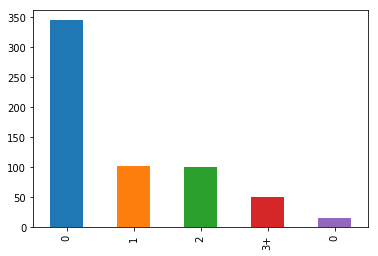

In [20]:
df1['Dependents'].value_counts().plot.bar()

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

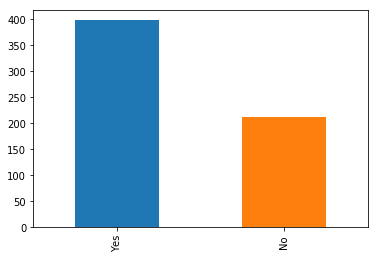

In [21]:
df1['Married'].value_counts().plot.bar()

In [22]:
df1['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [23]:
df1['Credit_History'].fillna(1.0,inplace=True)

In [24]:
df1['LoanAmount'].fillna(np.mean(df1['LoanAmount']),inplace=True)

In [25]:
df1['Loan_Amount_Term'].fillna(np.mean(df1['Loan_Amount_Term']),inplace=True)

In [26]:
df1['Married'].fillna('Yes',inplace=True)

In [27]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [28]:
cor=df1.corr()

## Correaltion between the data

In [29]:
import seaborn as sns

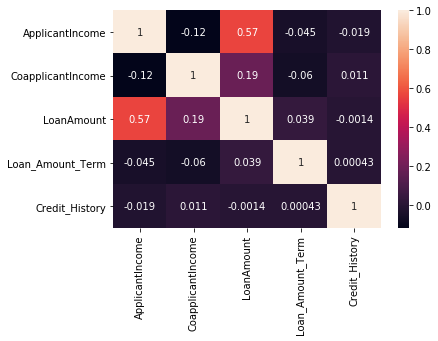

In [30]:
sns.heatmap(cor,annot=True)

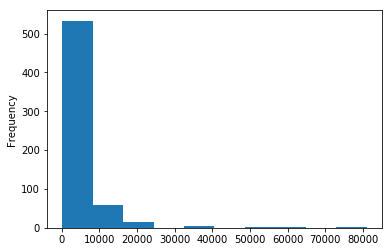

In [31]:
df1['ApplicantIncome'].plot.hist()

In [32]:
np.mean(df1['ApplicantIncome'])

5403.459283387622

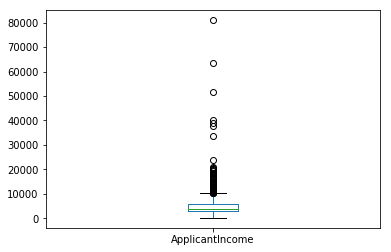

In [33]:
df1['ApplicantIncome'].plot.box()

In [34]:
k = np.median(df1['ApplicantIncome'])
df1.loc[df1['ApplicantIncome']>8000,'ApplicantIncome'] = int(k)

In [35]:
k

3812.5

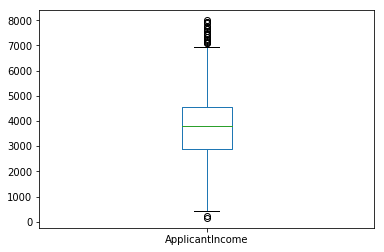

In [36]:
df1['ApplicantIncome'].plot.box()

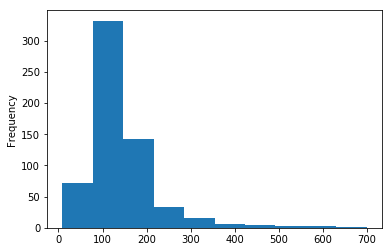

In [37]:
df1['LoanAmount'].plot.hist()

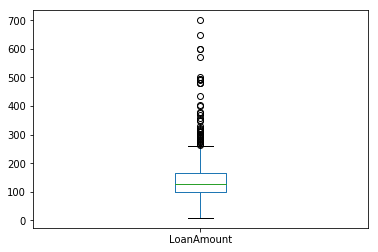

In [38]:
df1['LoanAmount'].plot.box()

In [39]:
k=np.median(df1['LoanAmount'])

In [40]:
df1.loc[df1['LoanAmount']>300,'LoanAmount']=k

In [41]:
X=df1.drop('Loan_Status',axis=1)

In [42]:
Y=df1['Loan_Status']

In [43]:
X.drop('Dependents',axis=1 , inplace= True)

In [44]:
cat_col=list(X.select_dtypes(include='object').columns)

In [45]:
cat_col

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

## Converting object type features to Int type using Label Encoding

In [46]:
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()

In [48]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Loan_ID              614 non-null object
Gender               614 non-null object
Married              614 non-null object
Education            614 non-null object
Self_Employed        614 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null object
dtypes: float64(4), int64(1), object(6)
memory usage: 52.8+ KB


In [49]:
X.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [50]:
for col in cat_col:
    print(col)
    X[col] = le.fit_transform(X[col])

Loan_ID
Gender
Married
Education
Self_Employed
Property_Area


In [2]:
X.head()

NameError: name 'X' is not defined

## Spliting the data into train test using train test split

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2,random_state=12,stratify=Y)

# Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
lr=LogisticRegression()

In [56]:
lr.fit(train_x,train_y)

C:\Users\Ritik\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
pred=lr.predict(test_x)

In [58]:
pred

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'N'], dtype=object)

In [59]:
lr.score(train_x,train_y)

0.8187372708757638

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
accuracy_score(test_y,pred)

0.7886178861788617

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           N       0.93      0.34      0.50        38
           Y       0.77      0.99      0.87        85

   micro avg       0.79      0.79      0.79       123
   macro avg       0.85      0.67      0.68       123
weighted avg       0.82      0.79      0.75       123



In [64]:
print(confusion_matrix(test_y,pred))

[[13 25]
 [ 1 84]]


In [65]:
y_pred = pd.DataFrame(pred,columns=['pred'])
y_pred['pred'].value_counts()

Y    109
N     14
Name: pred, dtype: int64

In [66]:
test_y.value_counts()

Y    85
N    38
Name: Loan_Status, dtype: int64

# Decision Tree Classifier

In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
clf=DecisionTreeClassifier()

In [69]:
clf.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
clf.score(train_x,train_y)

1.0

In [71]:
pred1=clf.predict(test_x)

In [72]:
accuracy_score(test_y,pred1)

0.6504065040650406

In [73]:
print(classification_report(test_y,pred1))

              precision    recall  f1-score   support

           N       0.44      0.50      0.47        38
           Y       0.76      0.72      0.74        85

   micro avg       0.65      0.65      0.65       123
   macro avg       0.60      0.61      0.60       123
weighted avg       0.66      0.65      0.66       123



In [74]:
print(confusion_matrix(test_y,pred1))

[[19 19]
 [24 61]]


# Importing Test Data Set

In [75]:
df2=pd.read_csv("E:\Data Sets\Loan_dataset(test).csv")

In [76]:
df2.shape

(367, 12)

In [77]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
Loan_ID              367 non-null object
Gender               356 non-null object
Married              367 non-null object
Dependents           357 non-null object
Education            367 non-null object
Self_Employed        344 non-null object
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           362 non-null float64
Loan_Amount_Term     361 non-null float64
Credit_History       338 non-null float64
Property_Area        367 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [84]:
df2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [80]:
df2['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [81]:
df2['Gender'].fillna('Male',inplace=True)

In [83]:
df2.drop('Dependents',1,inplace=True)

In [85]:
df2['Self_Employed'].value_counts()

No     307
Yes     37
Name: Self_Employed, dtype: int64

In [86]:
df2['Self_Employed'].fillna('No',inplace=True)

In [89]:
k=np.mean(df2['LoanAmount'])

In [90]:
df2['LoanAmount'].fillna(k,inplace=True)

In [93]:
k1=np.mean(df2['Loan_Amount_Term'])

In [94]:
df2['Loan_Amount_Term'].fillna(k1,inplace=True)

In [98]:
df2['Credit_History'].fillna(1.0,inplace=True)

In [99]:
df2['Credit_History'].value_counts()

1.0    308
0.0     59
Name: Credit_History, dtype: int64

In [100]:
df2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [101]:
cat_col_1=list(df2.select_dtypes('object').columns)

In [102]:
cat_col_1

['Loan_ID', 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

In [103]:
for i in cat_col_1:
    df2[i]=le.fit_transform(df2[i])

In [104]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
Loan_ID              367 non-null int32
Gender               367 non-null int32
Married              367 non-null int32
Education            367 non-null int32
Self_Employed        367 non-null int32
ApplicantIncome      367 non-null int64
CoapplicantIncome    367 non-null int64
LoanAmount           367 non-null float64
Loan_Amount_Term     367 non-null float64
Credit_History       367 non-null float64
Property_Area        367 non-null int32
dtypes: float64(3), int32(6), int64(2)
memory usage: 23.0 KB


In [106]:
res=lr.predict(df2)

In [107]:
res

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [108]:
df_final = pd.concat([df2,pd.Series(res,name='Loan_Status')],axis=1)

In [109]:
df_final.head()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,0,0,5720,0,110.0,360.0,1.0,2,Y
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2,Y
2,2,1,1,0,0,5000,1800,208.0,360.0,1.0,2,Y
3,3,1,1,0,0,2340,2546,100.0,360.0,1.0,2,Y
4,4,1,0,1,0,3276,0,78.0,360.0,1.0,2,Y


In [110]:
df_final.to_csv('loan_prediction_soln.csv', index=False)